In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

In [2]:
#Defining function to calculate average intensity for grayscale image
#Using Luminance Function
def BGR_to_GrayScale_using_Luminance(image):
    # Gray=0.299×Red+0.587×Green+0.114×Blue   Luminance formula
    gray_image = image.astype(float)
    gray_image = gray_image[:,:,0]*0.299+gray_image[:,:,0]*0.587+gray_image[:,:,0]*0.114
    gray_image.astype(np.uint8)

    #Normalizing the values using min max algorithm
    i_min = np.min(gray_image)
    i_max = np.max(gray_image)
    if(i_max - i_min != 0):
      gray_image = (gray_image - i_min)/(i_max - i_min)

    return gray_image

#Using Averaging Method
def BGR_to_GrayScale_using_averaging(image):
    gray_image = image.astype(float)
    gray_image = (gray_image[:,:,0]+gray_image[:,:,0]+gray_image[:,:,0])/3
    gray_image.astype(np.uint8)

    # #Normalizing the values using min max algorithm
    i_min = np.min(gray_image)
    i_max = np.max(gray_image)
    if(i_max - i_min != 0):
      gray_image = (gray_image - i_min)/(i_max - i_min)

    return gray_image

In [3]:
#Defining min-max normalization
def min_max_normalization(image):
    i_min = np.min(image)
    i_max = np.max(image)
    if(i_max - i_min != 0):
      image = (image - i_min)/(i_max - i_min)
    return image

In [4]:
def threshold_pixel(image,center,i,j):
  value_assigned =0;
  try:
    if image[i][j]>= center:
      value_assigned = 1
  except:
    pass

  return value_assigned

def lbp_calculator(image,i,j):
    center = image[i][j]
    # print(center)
    val_sequence =[]
    power_value=[128,64,32,16,8,4,2,1]
    #top-left
    val_sequence.append(threshold_pixel(image,center,i-1,j-1))

    #top
    val_sequence.append(threshold_pixel(image,center,i-1,j))

    #top-right
    val_sequence.append(threshold_pixel(image,center,i-1,j+1))

    #right
    val_sequence.append(threshold_pixel(image,center,i,j+1))

    #bottom-right
    val_sequence.append(threshold_pixel(image,center,i+1,j+1))

    #bottom
    val_sequence.append(threshold_pixel(image,center,i+1,j))

    #bottom-left
    val_sequence.append(threshold_pixel(image,center,i+1,j-1))

    #left
    val_sequence.append(threshold_pixel(image,center,i,j-1))

    val = 0

    for index in range(len(val_sequence)):
      # print(f"{power_value[index]}X{val_sequence[index]}={power_value[index]*val_sequence[index]}")
      val+=power_value[index]*val_sequence[index]

    return val

In [5]:
def traverse_image(image):
  height,width = image.shape[:2]

  for i in range(height):
    for j in range(width):
      image[i][j] = lbp_calculator(image,i,j)

  return min_max_normalization(image)

Text(0.5, 1.0, 'picture 1')

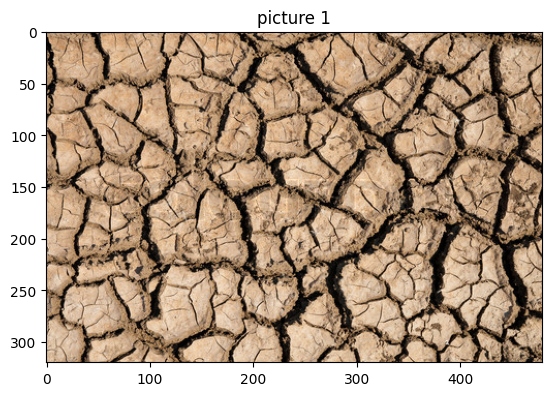

In [38]:
url = "/content/pic1.jpeg"
url1 ="/content/pic2.jpeg"
# url = input("Enter the path to image")

#Reading images using io class's imread function
pic1 = io.imread(url)
pic2= io.imread(url1)

#Converting images to np array
pic1= np.array(pic1)
pic2= np.array(pic2)

#showing Images
plt.plot(1, 2)
plt.imshow(pic1)
plt.title('picture 1')


Text(0.5, 1.0, 'picture 2')

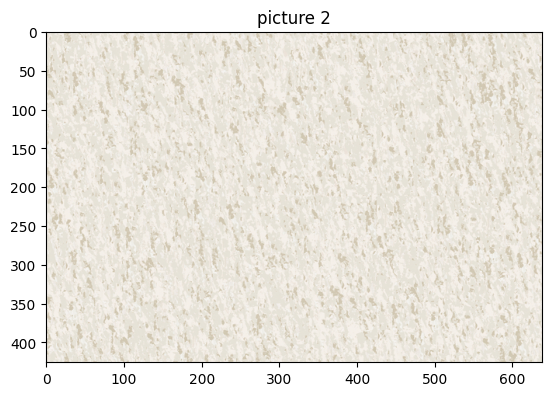

In [36]:
plt.plot(1, 2)
plt.imshow(pic2)
plt.title('picture 2')

In [22]:
gray_texture_1 = BGR_to_GrayScale_using_Luminance(pic1)
gray_texture_2 = BGR_to_GrayScale_using_averaging(pic2)

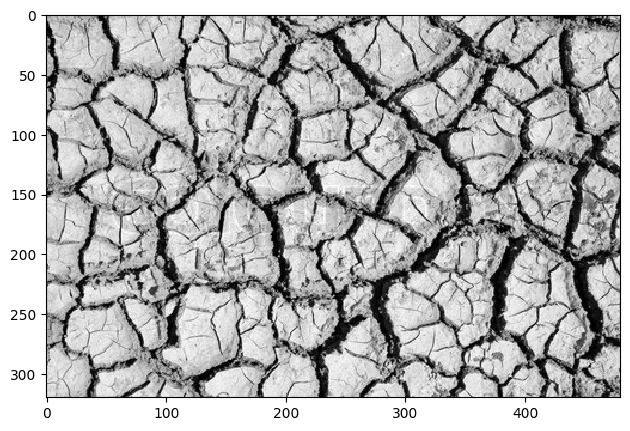

In [16]:
io.imshow(gray_texture_1)

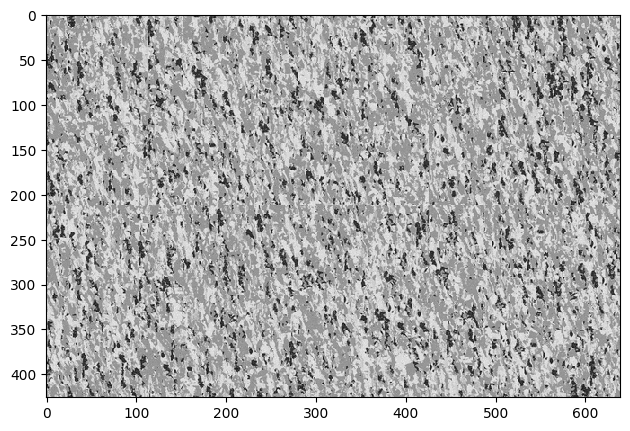

In [17]:
io.imshow(gray_texture_2)

In [18]:
texture_1_lbp = traverse_image(gray_texture_1)
texture_2_lbp = traverse_image(gray_texture_2)

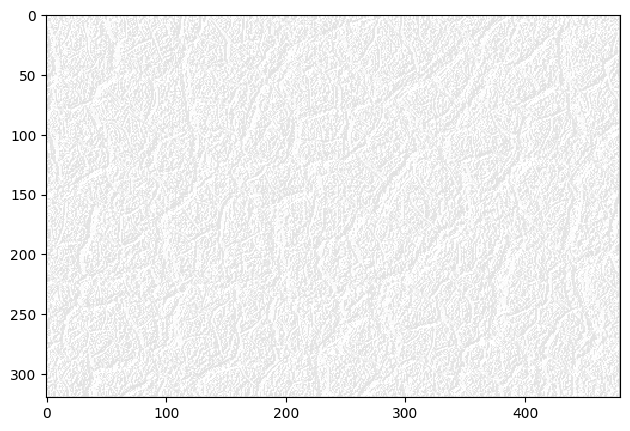

In [19]:
io.imshow(texture_1_lbp)

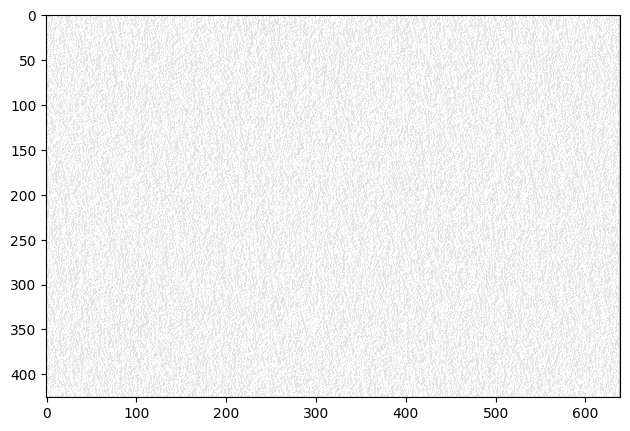

In [20]:
io.imshow(texture_2_lbp)